<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A4-Neural-Network-Classifier,-or-Fun-With-Handwritten-Digits!" data-toc-modified-id="A4-Neural-Network-Classifier,-or-Fun-With-Handwritten-Digits!-1">A4 Neural Network Classifier, or <em>Fun With Handwritten Digits</em>!</a></span><ul class="toc-item"><li><span><a href="#Requirement-1" data-toc-modified-id="Requirement-1-1.1">Requirement 1</a></span></li></ul></li><li><span><a href="#Apply-NeuralNetworkClassifier-to-Handwritten-Digits" data-toc-modified-id="Apply-NeuralNetworkClassifier-to-Handwritten-Digits-2">Apply <code>NeuralNetworkClassifier</code> to Handwritten Digits</a></span><ul class="toc-item"><li><span><a href="#Requirement-2" data-toc-modified-id="Requirement-2-2.1">Requirement 2</a></span></li></ul></li><li><span><a href="#Requirement-3" data-toc-modified-id="Requirement-3-3">Requirement 3</a></span></li><li><span><a href="#Requirement-4" data-toc-modified-id="Requirement-4-4">Requirement 4</a></span></li><li><span><a href="#Requirement-5" data-toc-modified-id="Requirement-5-5">Requirement 5</a></span><ul class="toc-item"><li><span><a href="#Check-In" data-toc-modified-id="Check-In-5.1">Check-In</a></span></li></ul></li><li><span><a href="#Grading" data-toc-modified-id="Grading-6">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-7">Extra Credit</a></span></li></ul></div>

# A4 Neural Network Classifier, or *Fun With Handwritten Digits*!

## Requirement 1

For this assignment, you will be adding code to the python script file `neuralnetworksA4.py` that you will [download from here](https://www.cs.colostate.edu/~anderson/cs545/notebooks/neuralnetworksA4.tar). The file `neuralnetworksA4.py` currently contains the implementation of the `NeuralNetwork` class that is a solution to A3. It also contains an incomplete implementation of the subclass `NeuralNetworkClassifier` that extends `NeuralNetwork` as discussed in class.  You must complete this implementation. Your `NeuralNetworkClassifier` implementation should rely on inheriting functions from `NeuralNetwork` as much as possible. Your `neuralnetworksA4.py` file (notice it is plural) will now contain two classes, `NeuralNetwork` and `NeuralNetworkClassifier`.  The tar file `neuralnetworksA4.tar` also contains `optimizers3.py`, another version of our optimizer code that you must use in this assignment.

In `NeuralNetworkClassifier` you will replace the `_error_f` function with one called `_neg_log_likelihood_f`. You will also have to define a new version of the `_gradient_f` function for `NeuralNetworkClassifier`.

Here are some example tests.

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import neuralnetworksA4 as nn

In [17]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [18]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [19]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2) has not been trained.


In [20]:
nnet.Ws

[array([[ 0.12952296, -0.38212533, -0.07383268,  0.31091752, -0.23633798,
         -0.40511172, -0.55139454, -0.09211682, -0.30174387, -0.18745848],
        [ 0.56662595, -0.3028474 , -0.48359706,  0.19583749,  0.13999926,
         -0.26066957, -0.03900416, -0.44067096, -0.49195143,  0.46277416],
        [ 0.33943873,  0.39325596,  0.36397022,  0.56690583,  0.08922813,
          0.36230683, -0.09085429, -0.5456561 , -0.05295844, -0.45573018]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])]

The `_error_f` function is replaced with `_neg_log_likelihood`.  If you add some print statements in `_neg_log_likelihood` functions, you can compare your output to the following results.

In [21]:
nnet.set_debug(True)

Debugging information will now be printed.


In [22]:
nnet.train(X, T, X, T, n_epochs=1, method='sgd', learning_rate=0.01)

X (standardized): 
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]
T (indicator variables):
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
Result of call to self._forward is:
[array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]]), array([[-0.65071726, -0.44024437,  0.04576217, -0.42339865, -0.43460927,
        -0.46740829, -0.39822372,  0.71346703,  0.23848393, -0.19208626],
       [ 0.34231299, -0.79254131, -0.72655903, -0.06007838, -0.18346578,
        -0.77314041, -0.46175878,  0.0128676 , -0.62959015,  0.62370478],
       [-0.09735492,  0.30405172,  0.64909581,  0.5928089 , -0.27947188,
         0.2144819 , -0.53935438, -0.19458859,  0.13639376, -0.80263068],
       [ 0.77613968, -0.28371417, -0.19108161,  0.79083647, -0.00711046,
        -0.294489  , -0.59233336, -0.79262132, -0.68931726, -0.1784822 ]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])]
Result of _softmax is:
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]
Result of np.log(Y + sys.float_

NeuralNetworkClassifier(2, [10], 2)

In [23]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2) trained for 1 epochs
  with final errors of 0.7071 train 0.7071 validation
  using best weights from epoch 1.


Now if you turn off debugging, most print statements will be suppressed so you can run for more epochs without tons of output.

In [24]:
nnet.set_debug(False)

No debugging information will be printed.


In [25]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [26]:
nnet.train(X, T, X, T, 100, method='adam')

Adam: Epoch 10 Likelihood= Train 0.96044 Validate 0.96044
Adam: Epoch 20 Likelihood= Train 0.99936 Validate 0.99936
Adam: Epoch 30 Likelihood= Train 0.99989 Validate 0.99989
Adam: Epoch 40 Likelihood= Train 0.99995 Validate 0.99995
Adam: Epoch 50 Likelihood= Train 0.99996 Validate 0.99996
Adam: Epoch 60 Likelihood= Train 0.99997 Validate 0.99997
Adam: Epoch 70 Likelihood= Train 0.99997 Validate 0.99997
Adam: Epoch 80 Likelihood= Train 0.99997 Validate 0.99997
Adam: Epoch 90 Likelihood= Train 0.99997 Validate 0.99997
Adam: Epoch 100 Likelihood= Train 0.99997 Validate 0.99997


NeuralNetworkClassifier(2, [10], 2)

In [27]:
print(nnet)

NeuralNetworkClassifier(2, [10], 2) trained for 100 epochs
  with final errors of 1.0000 train 1.0000 validation
  using best weights from epoch 100.


The `use()` function returns two `numpy` arrays. The first one are the class predictions for eachs sample, containing values from the set of unique values in `T` passed into the `train()` function.

The second value are the probabilities of each class for each sample. This should a column for each unique value in `T`.

In [28]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]]),
 array([[9.99996160e-01, 3.84039514e-06],
        [9.23756482e-05, 9.99907624e-01],
        [4.77851177e-06, 9.99995221e-01],
        [9.99875174e-01, 1.24826083e-04]]))

In [29]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [30]:
percent_correct(nnet.use(X)[0], T)

100.0

Works!  The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  

In [31]:
nnet = nn.NeuralNetworkClassifier(2, [], 2)  # [], so no hidden layers, just a linear model
nnet.train(X, T, X, T, 100, method='sgd', learning_rate=0.1, momentum=0.9)

SGD: Epoch 10 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 20 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 30 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 40 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 50 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 60 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 70 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 80 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 90 Likelihood= Train 0.70711 Validate 0.70711
SGD: Epoch 100 Likelihood= Train 0.70711 Validate 0.70711


NeuralNetworkClassifier(2, [], 2)

In [32]:
print(nnet)

NeuralNetworkClassifier(2, [], 2) trained for 100 epochs
  with final errors of 0.7071 train 0.7071 validation
  using best weights from epoch 1.


In [33]:
nnet.use(X)

(array([[0],
        [0],
        [0],
        [0]]),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [34]:
percent_correct(nnet.use(X)[0], T)

50.0

Now try with hidden layers.

In [35]:
nnet = nn.NeuralNetworkClassifier(2, [1], 2)  
nnet.train(X, T, X, T, 100, method='scg')

SCG: Epoch 10 Likelihood= Train 0.78148 Validate 0.78148
SCG: Epoch 20 Likelihood= Train 0.78756 Validate 0.78756
SCG: Epoch 30 Likelihood= Train 0.78765 Validate 0.78765
SCG: Epoch 40 Likelihood= Train 0.78766 Validate 0.78766
SCG: Epoch 50 Likelihood= Train 0.78766 Validate 0.78766


NeuralNetworkClassifier(2, [1], 2)

In [36]:
nnet = nn.NeuralNetworkClassifier(2, [5], 2)  
nnet.train(X, T, X, T, 400, method='sgd', learning_rate=0.1, momentum=0.9)

SGD: Epoch 40 Likelihood= Train 0.79771 Validate 0.79771
SGD: Epoch 80 Likelihood= Train 0.98391 Validate 0.98391
SGD: Epoch 120 Likelihood= Train 0.99338 Validate 0.99338
SGD: Epoch 160 Likelihood= Train 0.99558 Validate 0.99558
SGD: Epoch 200 Likelihood= Train 0.99667 Validate 0.99667
SGD: Epoch 240 Likelihood= Train 0.99732 Validate 0.99732
SGD: Epoch 280 Likelihood= Train 0.99777 Validate 0.99777
SGD: Epoch 320 Likelihood= Train 0.99808 Validate 0.99808
SGD: Epoch 360 Likelihood= Train 0.99832 Validate 0.99832
SGD: Epoch 400 Likelihood= Train 0.99850 Validate 0.99850


NeuralNetworkClassifier(2, [5], 2)

In [37]:
print(nnet)

NeuralNetworkClassifier(2, [5], 2) trained for 400 epochs
  with final errors of 0.9985 train 0.9985 validation
  using best weights from epoch 400.


A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [38]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [39]:
nnet.best_epoch

400

In [40]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]]),
 array([[0.99714056, 0.00285944],
        [0.00329779, 0.99670221],
        [0.00257252, 0.99742748],
        [0.99681034, 0.00318966]]))

In [41]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


,0,1
0,100.0,0.0
1,0.0,100.0


In [42]:
for method in ('sgd', 'adam', 'scg'):
    nnet = nn.NeuralNetworkClassifier(2, [20, 20], 2)  
    nnet.train(X, T, X, T, 400, method=method, learning_rate=0.1, momentum=0.9, verbose=False)
    pc = percent_correct(nnet.use(X)[0], T)
    print(f'{method} % Correct: {pc:.0f}')
    

sgd % Correct: 100
adam % Correct: 100
scg % Correct: 100


# Apply `NeuralNetworkClassifier` to Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](https://figshare.com/articles/dataset/mnist_pkl_gz/13303457/1).

First, make sure your solution works on the following examples. Then complete `make_mnist_classifier` and use it as instructed below.

In [43]:
import pickle
import gzip

In [44]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [45]:
28*28

784

In [46]:
def draw_digit(image, label, predicted_label=None):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    title = str(label)
    color = 'black'
    if predicted_label is not None:
        title += ' as {}'.format(predicted_label)
        if predicted_label != label:
            color = 'red'
    plt.title(title, color=color)

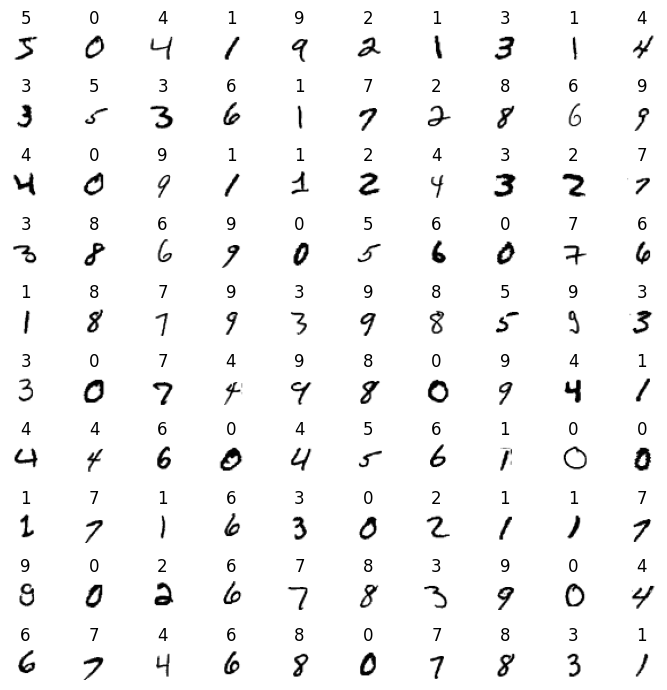

In [47]:
plt.figure(figsize=(7, 7))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_digit(Xtrain[i], Ttrain[i, 0])
plt.tight_layout()

In [48]:
nnet = nn.NeuralNetworkClassifier(784, [12], 10)
nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs=10, method='adam', learning_rate=0.1)
print(nnet)

Adam: Epoch 1 Likelihood= Train 0.31623 Validate 0.31623
Adam: Epoch 2 Likelihood= Train 0.33643 Validate 0.33727
Adam: Epoch 3 Likelihood= Train 0.48471 Validate 0.48865
Adam: Epoch 4 Likelihood= Train 0.57029 Validate 0.57864
Adam: Epoch 5 Likelihood= Train 0.63248 Validate 0.64564
Adam: Epoch 6 Likelihood= Train 0.67038 Validate 0.68594
Adam: Epoch 7 Likelihood= Train 0.69303 Validate 0.70926
Adam: Epoch 8 Likelihood= Train 0.70958 Validate 0.72586
Adam: Epoch 9 Likelihood= Train 0.72223 Validate 0.73764
Adam: Epoch 10 Likelihood= Train 0.73178 Validate 0.74550
NeuralNetworkClassifier(784, [12], 10) trained for 10 epochs
  with final errors of 0.7318 train 0.7318 validation
  using best weights from epoch 10.


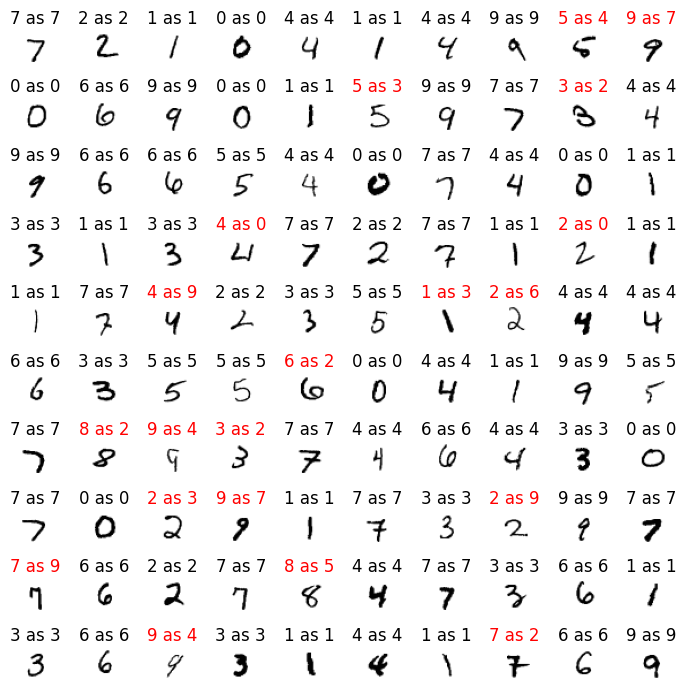

In [49]:
def first_100_tests(nnet, Xtest, Ttest):
    plt.figure(figsize=(7, 7))
    Ytest, _ = nnet.use(Xtest[:100, :])
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        draw_digit(Xtest[i], Ttest[i, 0], Ytest[i, 0])
    plt.tight_layout()

first_100_tests(nnet, Xtest, Ttest)

## Requirement 2



Experiment with the three different optimization methods, at least three hidden layer structures including `[]`, two learning rates, and two numbers of epochs.  Use `verbose=False` as an argument to `train()`.  For `scg`, ignore the learning rate loop.  Print a single line for each run showing method, number of epochs, learning rate, hidden layer structure, and percent correct for training, validation, and testing data. Here is an example line:

        sgd   10 0.1 []       77.16 79.22 79.05
        
Or you can use a `pandas.DataFrame` to show your results.
    

In [50]:
# ...
method_rhos = ['sgd','adam','scg'] 
structures = [[], [10], [40], [100]]
epochs = [40, 200]
learning_rates = [0.1, 0.001]
cols = ['Structure', 'Epochs', 'Learning Rate', 'Train % correct', 'Validation % correct', 'Test % correct']
rho_index = 0
str_index = 0
lr_index = 0
epoch_index = 0
output_rowFrame = []
#str -> lr -> epoch
for i in range(0, 48):
    if (i % 16 == 0 and i != 0):
        rho_index += 1
    if (i % 4 == 0 and i != 0):
        if str_index + 1 == len(structures): #restart the epoch index count cycle
            str_index = 0
        else:
            str_index += 1
    if (i % 2 == 0 and i != 0):
        if epoch_index + 1 == len(epochs): #restart the epoch index count cycle
            epoch_index = 0
        else:
            epoch_index += 1
    nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], structures[str_index], len(np.unique(Ttrain)))
    nnet.train(Xtrain, Ttrain, Xval, Tval, epochs[epoch_index], method=method_rhos[rho_index], learning_rate=learning_rates[lr_index],
               momentum=0.9, verbose = False)  # momentum only affects sgd)
    train_percent = percent_correct(nnet.use(Xtrain)[0], Ttrain)
    val_percent = percent_correct(nnet.use(Xval)[0], Tval)
    test_percent = percent_correct(nnet.use(Xtest)[0], Ttest)
   
    output_rowFrame.append([method_rhos[rho_index], epochs[epoch_index], learning_rates[lr_index], structures[str_index], train_percent, val_percent, test_percent])
    print("Method {} Structure {} learning rate {} epoch {}".format(method_rhos[rho_index], structures[str_index], learning_rates[lr_index], epochs[epoch_index]))     
    if lr_index + 1 == len(learning_rates): #restart the epoch index count cycle
        lr_index = 0
    else:
        lr_index += 1
output_rowFrame


Method sgd Structure [] learning rate 0.1 epoch 40
Method sgd Structure [] learning rate 0.001 epoch 40
Method sgd Structure [] learning rate 0.1 epoch 200
Method sgd Structure [] learning rate 0.001 epoch 200
Method sgd Structure [10] learning rate 0.1 epoch 40
Method sgd Structure [10] learning rate 0.001 epoch 40
Method sgd Structure [10] learning rate 0.1 epoch 200
Method sgd Structure [10] learning rate 0.001 epoch 200
Method sgd Structure [40] learning rate 0.1 epoch 40
Method sgd Structure [40] learning rate 0.001 epoch 40
Method sgd Structure [40] learning rate 0.1 epoch 200
Method sgd Structure [40] learning rate 0.001 epoch 200
Method sgd Structure [100] learning rate 0.1 epoch 40
Method sgd Structure [100] learning rate 0.001 epoch 40
Method sgd Structure [100] learning rate 0.1 epoch 200
Method sgd Structure [100] learning rate 0.001 epoch 200
Method adam Structure [] learning rate 0.1 epoch 40
Method adam Structure [] learning rate 0.001 epoch 40
Method adam Structure [] l

[['sgd', 40, 0.1, [], 88.248, 89.42999999999999, 88.68],
 ['sgd', 40, 0.001, [], 73.512, 75.62, 75.55],
 ['sgd', 200, 0.1, [], 91.22200000000001, 91.78, 91.29],
 ['sgd', 200, 0.001, [], 76.73400000000001, 78.78, 78.66],
 ['sgd', 40, 0.1, [10], 39.744, 39.97, 39.96],
 ['sgd', 40, 0.001, [10], 36.876, 36.7, 37.37],
 ['sgd', 200, 0.1, [10], 86.996, 88.17, 87.22],
 ['sgd', 200, 0.001, [10], 33.456, 33.36, 33.94],
 ['sgd', 40, 0.1, [40], 59.016000000000005, 59.919999999999995, 59.84],
 ['sgd', 40, 0.001, [40], 51.641999999999996, 52.94, 52.71],
 ['sgd', 200, 0.1, [40], 90.398, 91.19, 90.34],
 ['sgd', 200, 0.001, [40], 54.858, 56.39999999999999, 56.54],
 ['sgd', 40, 0.1, [100], 68.44200000000001, 70.27, 70.0],
 ['sgd', 40, 0.001, [100], 60.084, 62.480000000000004, 62.57],
 ['sgd', 200, 0.1, [100], 90.946, 91.73, 91.02],
 ['sgd', 200, 0.001, [100], 65.59, 67.72, 67.51],
 ['adam', 40, 0.1, [], 76.53, 78.79, 78.12],
 ['adam', 40, 0.001, [], 86.452, 87.94, 87.06],
 ['adam', 200, 0.1, [], 76.53, 

In [51]:
cols = ['Method', 'Epochs', 'Learning Rate', 'Structure', 'Train%', 'Val%', 'Test%']
d = pandas.DataFrame(output_rowFrame,columns=cols)
df = pandas.DataFrame(data=d)
df

,Method,Epochs,Learning Rate,Structure,Train%,Val%,Test%
0,sgd,40,0.100,[],88.248,89.43,88.68
1,sgd,40,0.001,[],73.512,75.62,75.55
2,sgd,200,0.100,[],91.222,91.78,91.29
3,sgd,200,0.001,[],76.734,78.78,78.66
4,sgd,40,0.100,[10],39.744,39.97,39.96
5,sgd,40,0.001,[10],36.876,36.70,37.37
6,sgd,200,0.100,[10],86.996,88.17,87.22
7,sgd,200,0.001,[10],33.456,33.36,33.94
8,sgd,40,0.100,[40],59.016,59.92,59.84
9,sgd,40,0.001,[40],51.642,52.94,52.71


# Requirement 3

Complete the following function.

In [24]:
def make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest,
                          n_hidden_units_each_layer, n_epochs,
                          method, learning_rate=0.1, momentum=0.9):
    
    from IPython.display import display   # to display the confusion matrix in the last step of this function
    
    # Create NeuralNetworkClassifier object
    # ...
    nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], n_hidden_units_each_layer, len(np.unique(Ttrain)))
    
    # Train it.
    # ...
    nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs, method, learning_rate)
    
    # Plot the performance trace with legend (f'{method} Train Data', f'{method} Validation Data')
    # ...
    plt.plot(nnet.performance_trace)
    plt.xlabel('Epoch')
    plt.ylabel('Data Likelihood')
    plt.legend(labels = [f'{method} Train Data', f'{method} Validation Data'])
    
    # for methodi, method in enumerate([mr[0] for mr in method_rhos]):
    #     for train_val_i, train_val in enumerate(['Train', 'Validate']):
    #         plt.plot(errors[methodi, :, train_val_i], f'{colors[methodi]}{styles[train_val_i]}',
    #                  label=f'{method} {train_val}')
    # plt.xlabel('Epoch')
    # plt.ylabel('Standardized error')

    # Show the results on the first 100 test images.
    # ...
    first_100_tests(nnet, Xtest, Ttest)
    
    plt.show()

    # Print the network
    print(nnet)
    
    # Print percent correct on training data, validation data and test data.
    # ...
    print("Training {} % correct".format(percent_correct(nnet.use(Xtrain)[0], Ttrain)))
    print("Validation {} % correct".format(percent_correct(nnet.use(Xval)[0], Tval)))
    print("Testing {} % correct".format(percent_correct(nnet.use(Xtest)[0], Ttest)))

    # Print a confusion matrix using the trained neural network applied to the testing data.
    # display(confusion_matrix( ... )
    display(confusion_matrix(nnet.use(Xtest)[0], Ttest))
    

Use your function to show results with the three different optimization methods using values for the hidden layer structure, learning rate, and numbers of epochs that works well for all three methods.

Adam: Epoch 10 Likelihood= Train 0.67731 Validate 0.69495
Adam: Epoch 20 Likelihood= Train 0.74947 Validate 0.76507
Adam: Epoch 30 Likelihood= Train 0.78635 Validate 0.79192
Adam: Epoch 40 Likelihood= Train 0.80671 Validate 0.80821
Adam: Epoch 50 Likelihood= Train 0.82030 Validate 0.81633
Adam: Epoch 60 Likelihood= Train 0.82995 Validate 0.82152
Adam: Epoch 70 Likelihood= Train 0.83671 Validate 0.82253
Adam: Epoch 80 Likelihood= Train 0.84179 Validate 0.82342
Adam: Epoch 90 Likelihood= Train 0.84565 Validate 0.82384
Adam: Epoch 100 Likelihood= Train 0.84888 Validate 0.82372


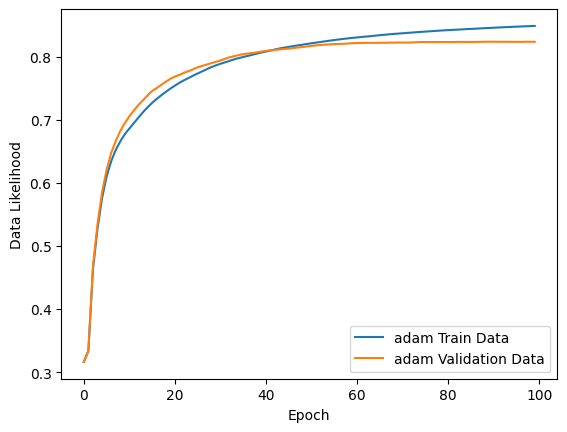

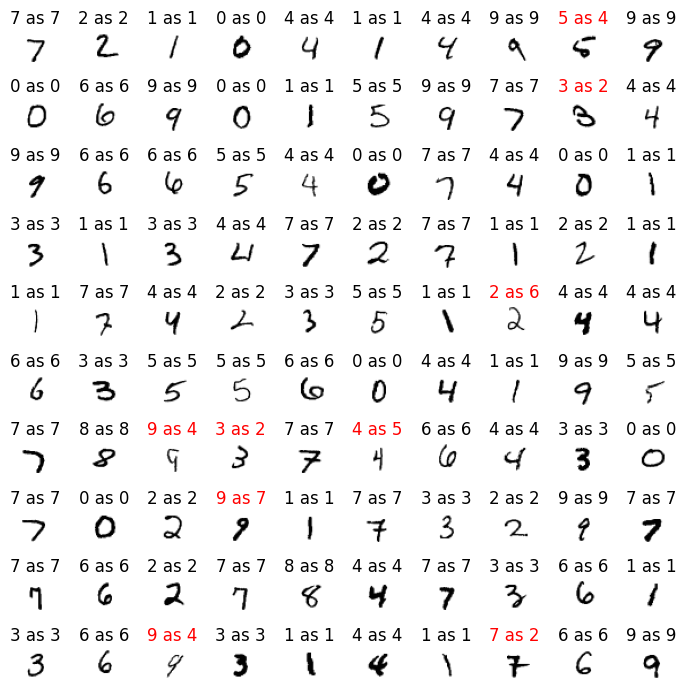

NeuralNetworkClassifier(784, [10], 10) trained for 100 epochs
  with final errors of 0.8489 train 0.8489 validation
  using best weights from epoch 90.
Training 91.038 % correct
Validation 89.38000000000001 % correct
Testing 89.02 % correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,93.4,0.0,1.2,0.6,0.4,1.4,1.4,0.3,0.6,0.6
1,0.0,97.4,0.7,0.6,0.0,0.3,0.3,0.2,0.5,0.0
2,0.8,0.2,86.5,2.8,1.1,0.1,3.2,1.1,4.2,0.1
3,0.1,0.3,3.6,86.9,0.6,2.6,0.3,2.3,2.6,0.8
4,0.1,0.3,0.8,0.0,91.0,0.5,1.5,0.5,0.8,4.4
5,1.5,0.1,0.6,3.3,1.1,82.0,2.5,1.0,6.8,1.2
6,1.1,0.1,1.1,0.0,1.4,1.7,93.7,0.3,0.4,0.1
7,0.3,0.7,2.4,1.4,0.7,0.2,0.1,90.5,0.7,3.1
8,1.3,1.7,1.8,3.9,0.8,6.5,1.2,1.2,79.5,2.0
9,0.7,0.4,0.2,1.6,5.3,0.8,0.3,2.5,0.8,87.5


In [31]:
hiddens = [10]
n_epochs = 100
method = 'adam'
learning_rate = 0.1
make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, method, learning_rate)

SGD: Epoch 30 Likelihood= Train 0.37702 Validate 0.37839
SGD: Epoch 60 Likelihood= Train 0.59073 Validate 0.59827
SGD: Epoch 90 Likelihood= Train 0.72270 Validate 0.73494
SGD: Epoch 120 Likelihood= Train 0.78223 Validate 0.79502
SGD: Epoch 150 Likelihood= Train 0.81132 Validate 0.82326
SGD: Epoch 180 Likelihood= Train 0.82865 Validate 0.83940
SGD: Epoch 210 Likelihood= Train 0.84051 Validate 0.85009
SGD: Epoch 240 Likelihood= Train 0.84941 Validate 0.85784
SGD: Epoch 270 Likelihood= Train 0.85646 Validate 0.86381
SGD: Epoch 300 Likelihood= Train 0.86227 Validate 0.86860


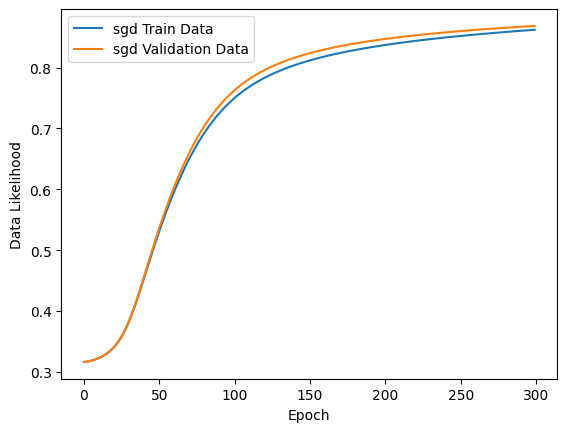

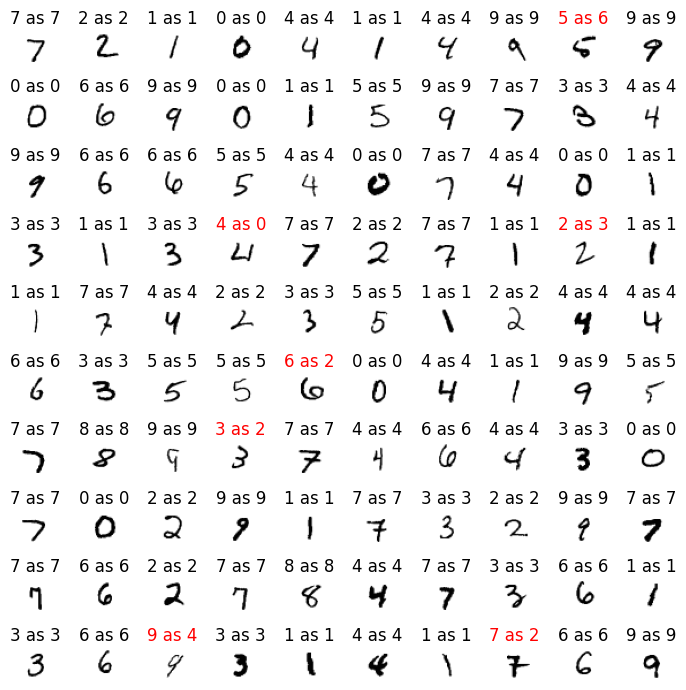

NeuralNetworkClassifier(784, [40], 10) trained for 300 epochs
  with final errors of 0.8623 train 0.8623 validation
  using best weights from epoch 300.
Training 91.818 % correct
Validation 92.31 % correct
Testing 91.61 % correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.7,0.0,0.1,0.2,0.0,0.5,1.1,0.2,0.2,0.0
1,0.0,97.5,0.3,0.2,0.1,0.0,0.4,0.2,1.4,0.0
2,1.6,0.7,89.1,1.7,1.5,0.1,1.0,1.2,3.0,0.2
3,0.1,0.2,1.8,90.0,0.3,3.1,0.4,1.9,1.7,0.6
4,0.2,0.3,0.5,0.0,94.1,0.1,1.0,0.2,0.3,3.3
5,1.2,0.4,0.3,4.4,1.5,85.1,1.8,1.5,2.9,0.9
6,1.5,0.5,0.7,0.0,0.8,1.4,94.7,0.1,0.3,0.0
7,0.3,1.8,1.8,0.5,0.9,0.0,0.0,91.6,0.1,3.0
8,0.6,1.3,0.7,2.2,1.5,3.0,1.1,1.3,86.4,1.7
9,1.5,0.6,0.1,1.1,4.5,0.6,0.1,2.4,0.6,88.6


In [33]:
#Method sgd Structure [10, 10] learning rate 0.001 epoch 40
hiddens = [40]
n_epochs = 300
method = 'sgd'
learning_rate = 0.1
make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, method, learning_rate)

SCG: Epoch 3 Likelihood= Train 0.63236 Validate 0.65643
SCG: Epoch 6 Likelihood= Train 0.76859 Validate 0.78054
SCG: Epoch 9 Likelihood= Train 0.81271 Validate 0.82391
SCG: Epoch 12 Likelihood= Train 0.84066 Validate 0.84895
SCG: Epoch 15 Likelihood= Train 0.85077 Validate 0.85675
SCG: Epoch 18 Likelihood= Train 0.86903 Validate 0.87170
SCG: Epoch 21 Likelihood= Train 0.88309 Validate 0.88182
SCG: Epoch 24 Likelihood= Train 0.89055 Validate 0.88744
SCG: Epoch 27 Likelihood= Train 0.90283 Validate 0.89674
SCG: Epoch 30 Likelihood= Train 0.91117 Validate 0.90267


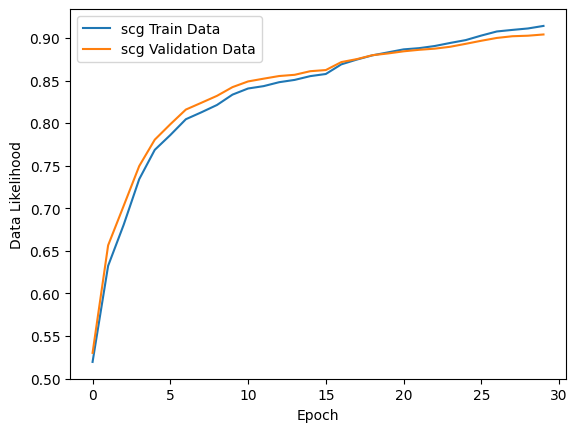

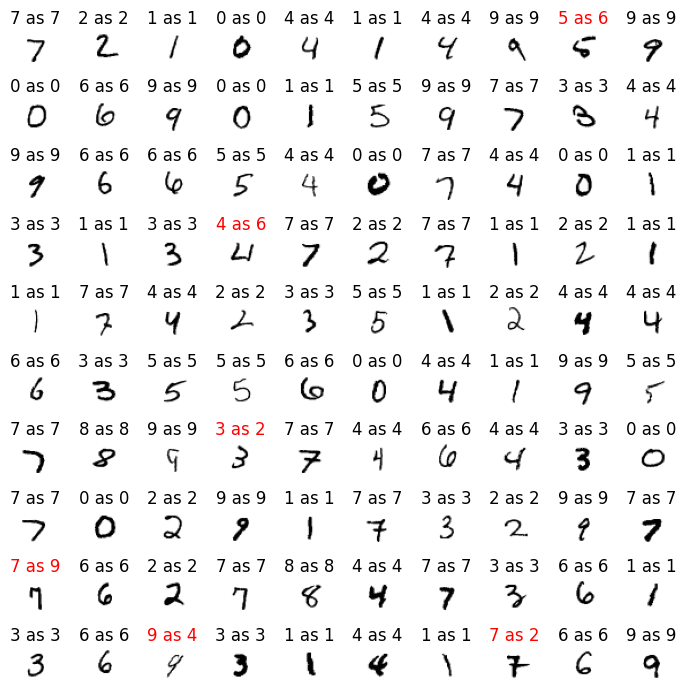

NeuralNetworkClassifier(784, [40], 10) trained for 30 epochs
  with final errors of 0.9142 train 0.9142 validation
  using best weights from epoch 32.
Training 94.89800000000001 % correct
Validation 94.54 % correct
Testing 93.69 % correct
Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.9,0.0,0.1,0.2,0.0,0.6,0.9,0.1,0.1,0.1
1,0.0,98.7,0.4,0.1,0.1,0.1,0.4,0.1,0.2,0.0
2,0.8,0.4,92.2,1.0,1.0,0.2,1.1,1.1,2.2,0.1
3,0.1,0.1,2.0,91.6,0.1,2.2,0.2,1.1,2.1,0.6
4,0.1,0.1,0.4,0.1,95.2,0.0,1.3,0.2,0.5,2.0
5,0.8,0.4,0.1,3.0,0.8,88.7,1.7,1.1,2.9,0.4
6,0.8,0.4,0.4,0.0,0.6,1.5,95.8,0.2,0.2,0.0
7,0.1,1.2,1.6,0.3,0.4,0.0,0.0,94.3,0.0,2.2
8,0.4,0.8,0.7,1.7,1.1,2.0,0.5,1.2,91.1,0.4
9,1.1,0.8,0.2,1.0,3.4,0.7,0.0,1.7,0.7,90.5


In [35]:
#200, 0.001, [100]
hiddens = [40]
n_epochs = 30
method = 'scg'
learning_rate = 0.1
make_mnist_classifier(Xtrain, Ttrain, Xval, Tval, Xtest, Ttest, hiddens, n_epochs, method, learning_rate)

# Requirement 4

Discuss your results.  In your discussion, include observations about 

* which method achieves the best result,
* which method seems to do best with fewer epochs,
* what common classification mistakes are made as shown in your confusion matrices, and
* do larger networks (more layers, more units) work better than small networks?

Based on the observations above, the 'scg' method yields the best results. The scg method yields a higher accuracy for the classification while requiring less number of epochs to do so. This is not all that surprisng given scg's reputation for being able to converge faster than the other optimization methods. scg utilizes the sign of derivative for the direction of weight update; that is, the magnitude of the derivative does not affect the weight-updating process. This eliminates the harmful effects of the magnitude of derivatives and results in faster convergence.
scg method performs the best with fewer epochs.
The common classification mistakes as per the confusion matrices include mistakes such as labelling 5 as 6, 4 as 6, 3 as 2, 7 as 9, 9 as 4, 7 as 2. 
Yes, larger networks particularly the ones with larger number of units seem to perform better than those with lesser number of units. Although, it is important to note that increasing the number of units beyond a certain threshold actually doesn't yield much of an improvement. In fact, the training time worsens and that can be considered a degradation in terms of performance. So, while more number of units generally yields better results than say no hidden units or low number of hidden units, there's a limit up to which the improvements happen and beyond which the performance might fall off or stagnate. And also, more layers can also lead to overfitting - something we should be wary of.


# Requirement 5 - Extra Credit 1

Train a network with values for method, learning rate, number of epochs, and a 
hidden layer structure with no more than 100 units in the first layer that you found work well.  Extract the
weight matrix from the first layer.  Now, for each unit (column in the weight matrix) ignore the first row of bias weights and
reshape the remaining weights into a 28 x 28 image for each unit and display them. Complete the following function to draw the weight matrix for one unit using `draw_digit` as a guide, then use it in a loop to draw the weight matrices for each unit in the first layer of your network.

Discuss what you see.  Describe some of the images as patterns that could be useful for classifying particular digits.

In [124]:
#Train network
hiddens = [40]
n_epochs = 30
method = 'scg'
learning_rate = 0.1
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], hiddens, len(np.unique(Ttrain)))
nnet.train(Xtrain, Ttrain, Xval, Tval, n_epochs, method, learning_rate)

SCG: Epoch 3 Likelihood= Train 0.51937 Validate 0.53615
SCG: Epoch 6 Likelihood= Train 0.51937 Validate 0.53615
SCG: Epoch 9 Likelihood= Train 0.57796 Validate 0.60128
SCG: Epoch 12 Likelihood= Train 0.76131 Validate 0.77875
SCG: Epoch 15 Likelihood= Train 0.82366 Validate 0.83595
SCG: Epoch 18 Likelihood= Train 0.85364 Validate 0.86056
SCG: Epoch 21 Likelihood= Train 0.87041 Validate 0.87274
SCG: Epoch 24 Likelihood= Train 0.88576 Validate 0.88346
SCG: Epoch 27 Likelihood= Train 0.89508 Validate 0.89023
SCG: Epoch 30 Likelihood= Train 0.90398 Validate 0.89670


NeuralNetworkClassifier(784, [40], 10)

In [125]:
nnet.Ws[0].shape

(785, 40)

In [159]:
#apply thresholding
def draw_weight_matrix(W, unit_index = 0):
    """W is matrix of weights, with shape 784 x n_units in first layer of neural network"""
    w_minus_bias = W[1:, unit_index]
    image = w_minus_bias.reshape((-1, 28, 28))
    apply_thresholding_draw_digit(image, unit_index, True)
    ...

In [160]:
def apply_thresholding_draw_digit(image, unit_index, apply):
    if (apply):
        import cv2
        blurred = cv2.GaussianBlur(image, (7, 7), 0)
        (T, threshInv) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV)
        draw_digit(threshInv, "Unit {}".format(unit_index + 1))
    else:
        draw_digit(image, "Unit {}".format(unit_index + 1))

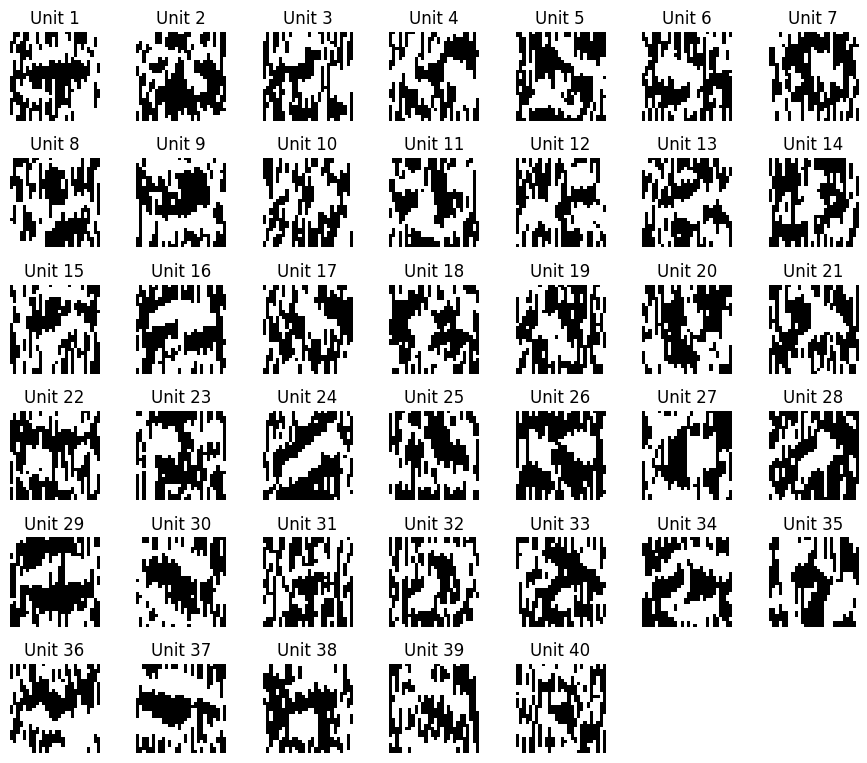

In [161]:
W = nnet.Ws[0]
n_units = W.shape[1]
n_plot_rows = round(np.sqrt(n_units) + 0.5)
n_plot_cols = n_plot_rows

plt.figure(figsize=(9, 9))
for i in range(n_units):
    plt.subplot(n_plot_rows, n_plot_cols, i+1)
    draw_weight_matrix(W, i)
plt.tight_layout()

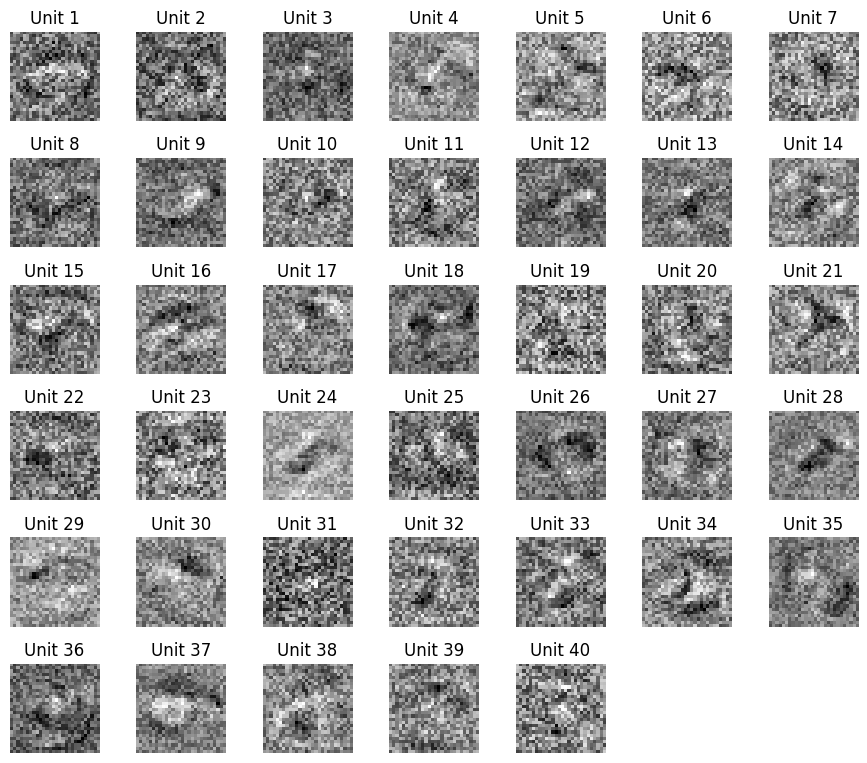

In [162]:
#no thresholding on the images
def draw_weight_matrix(W, unit_index = 0):
    """W is matrix of weights, with shape 784 x n_units in first layer of neural network"""
    w_minus_bias = W[1:, unit_index]
    image = w_minus_bias.reshape((-1, 28, 28))
    apply_thresholding_draw_digit(image, unit_index, False)
    ...
W = nnet.Ws[0]
n_units = W.shape[1]
n_plot_rows = round(np.sqrt(n_units) + 0.5)
n_plot_cols = n_plot_rows

plt.figure(figsize=(9, 9))
for i in range(n_units):
    plt.subplot(n_plot_rows, n_plot_cols, i+1)
    draw_weight_matrix(W, i)
plt.tight_layout()

I honestly didn't see much of a useful pattern from the graphs compiled above. Of course, if I squint hard enough, I think I can see something vaguely resembling a digit (for example: Unit 16 remotely resembles a 2), but the bottomline is that most of the patterns did not appear distinctive enough for me to take a guess at which digit it could be representing. I also tried thresholding the images to make patterns more distinct, but that didn't really make much of a difference. However, the images do represent curves which can be considered somewhat representative of a digit and the patterns might become more clear after application of some digital image processing techniques.

## Check-In

Tar or zip your jupyter notebook (`A4solution.ipynb`) and your python script file (`neuralnetworksA4.py`) into a file named `A4.tar` or `A4.zip`.  You do not need to include `optimizers3.py` in your tar or zip file. Check in the tar or zip file in Canvas.

# Grading

Download [A4grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A4grader.tar), extract `A4grader.py` before running the following cell.

Remember, you are expected to design and run your own tests in addition to the tests provided in `A4grader.py`.

In [263]:
%run -i A4grader.py


======================= Code Execution =======================


 import neuralnetworksA4 as nn 
neuralnetworksA4.py defines NeuralNetwork and NeuralNetworkClassifier

## Testing inheritance ####################################################################

    correct = issubclass(nn.NeuralNetworkClassifier, nn.NeuralNetwork)


--- 10/10 points. NeuralNetworkClassifier correctly extends NeuralNetwork.

## Testing inheritance ####################################################################

    # Checking if the _forward function in NeuralNetworkClassifier is inherited from NeuralNetwork

    import inspect
    forward_func = [f for f in inspect.classify_class_attrs(nn.NeuralNetworkClassifier) if (f.name == 'forward' or f.name == '_forward')]
    correct = forward_func[0].defining_class == nn.NeuralNetwork


--- 5/5 points. NeuralNetworkClassifier _forward function correctly inherited from NeuralNetwork.

## Testing inheritance ##################################################

# Extra Credit 2

Repeat the above experiments with a different classification data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.

In [253]:
import pandas as pd

# Read the csv file as a pandas.DataFrame
df = pd.read_csv('defects_train.csv')


df

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


## Dataset Overview
The dataset has been compiled from Kaggle and is about Software Defect Prediction. The target column is the last one named `defects` with True or False values. As will be discovered / discussed later, the dataset is imbalanced with the False:True target value ration being 3:1

In [256]:
df = df.drop(columns=['id'])
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


In [257]:
# Getting input data, target data from csv

In [258]:
Xd = df.iloc[:, :-1]
X_names = Xd.columns
X = Xd.values

Td = df.iloc[:, -1:]
T_names = Td.columns
T = Td.values

X.shape, X_names, T.shape, T_names

((101763, 21),
 Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
        'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
        'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
       dtype='object'),
 (101763, 1),
 Index(['defects'], dtype='object'))

In [259]:
#prepare train, validation, test partitions
rows = np.arange(X.shape[0])
np.random.shuffle(rows)
ntrain = int(0.8 * len(rows))
nValidation = int(0.9 * len(rows))

X_train = X[rows[:ntrain], :]
T_train = T[rows[:ntrain], :]
X_validate = X[rows[ntrain:nValidation], :]
T_validate = T[rows[ntrain:nValidation], :]
X_test = X[rows[nValidation + 1:], :]
T_test = T[rows[nValidation + 1:], :]

print(f'Defects sample: {X_train.shape=}, {T_train.shape=}, {X_validate.shape=}, {T_validate.shape=}, {X_test.shape=}, {T_test.shape=}')


Defects sample: X_train.shape=(81410, 21), T_train.shape=(81410, 1), X_validate.shape=(10176, 21), T_validate.shape=(10176, 1), X_test.shape=(10176, 21), T_test.shape=(10176, 1)


# Time to Apply our neural network classifier to this dataset

Picked three decent runs for each of the three optimization strategies

In [260]:
nnet2 = nn.NeuralNetworkClassifier(X_train.shape[1], [50], 2)
nnet2.train(X_train, T_train, X_validate, T_validate, n_epochs=100, method='adam', learning_rate=0.1)

print("Training {} % correct".format(percent_correct(nnet2.use(X_train)[0], T_train)))
print("Validation {} % correct".format(percent_correct(nnet2.use(X_validate)[0], T_validate)))
print("Testing {} % correct".format(percent_correct(nnet2.use(X_test)[0], T_test)))

# Print a confusion matrix using the trained neural network applied to the testing data.
# display(confusion_matrix( ... )
display(confusion_matrix(nnet2.use(X_test)[0], T_test))

Adam: Epoch 10 Likelihood= Train 0.64447 Validate 0.65434
Adam: Epoch 20 Likelihood= Train 0.73076 Validate 0.73902
Adam: Epoch 30 Likelihood= Train 0.77953 Validate 0.78528
Adam: Epoch 40 Likelihood= Train 0.80316 Validate 0.80609
Adam: Epoch 50 Likelihood= Train 0.80073 Validate 0.80280
Adam: Epoch 60 Likelihood= Train 0.80440 Validate 0.80801
Adam: Epoch 70 Likelihood= Train 0.80528 Validate 0.80859
Adam: Epoch 80 Likelihood= Train 0.80547 Validate 0.80862
Adam: Epoch 90 Likelihood= Train 0.80567 Validate 0.80896
Adam: Epoch 100 Likelihood= Train 0.80585 Validate 0.80899
Training 81.42242967694386 % correct
Validation 81.61360062893081 % correct
Testing 81.46619496855347 % correct
Percent Correct


,False,True
False,94.1,5.9
True,59.9,40.1


In [261]:
nnet2 = nn.NeuralNetworkClassifier(X_train.shape[1], [40], 2)
nnet2.train(X_train, T_train, X_validate, T_validate, n_epochs=30, method='scg', learning_rate=0.1)
print("Training {} % correct".format(percent_correct(nnet2.use(X_train)[0], T_train)))
print("Validation {} % correct".format(percent_correct(nnet2.use(X_validate)[0], T_validate)))
print("Testing {} % correct".format(percent_correct(nnet2.use(X_test)[0], T_test)))

# Print a confusion matrix using the trained neural network applied to the testing data.
# display(confusion_matrix( ... )
display(confusion_matrix(nnet2.use(X_test)[0], T_test))

SCG: Epoch 3 Likelihood= Train 0.79478 Validate 0.79669
SCG: Epoch 6 Likelihood= Train 0.80203 Validate 0.80448
SCG: Epoch 9 Likelihood= Train 0.80345 Validate 0.80621
SCG: Epoch 12 Likelihood= Train 0.80389 Validate 0.80657
SCG: Epoch 15 Likelihood= Train 0.80467 Validate 0.80692
SCG: Epoch 18 Likelihood= Train 0.80509 Validate 0.80746
SCG: Epoch 21 Likelihood= Train 0.80538 Validate 0.80796
SCG: Epoch 24 Likelihood= Train 0.80557 Validate 0.80839
SCG: Epoch 27 Likelihood= Train 0.80574 Validate 0.80876
SCG: Epoch 30 Likelihood= Train 0.80585 Validate 0.80897
Training 81.33890185480898 % correct
Validation 81.62342767295597 % correct
Testing 81.26965408805032 % correct
Percent Correct


,False,True
False,93.9,6.1
True,60.3,39.7


In [262]:
nnet2 = nn.NeuralNetworkClassifier(X_train.shape[1], [40], 2)
nnet2.train(X_train, T_train, X_validate, T_validate, n_epochs=300, method='sgd', learning_rate=0.1)

print("Training {} % correct".format(percent_correct(nnet2.use(X_train)[0], T_train)))
print("Validation {} % correct".format(percent_correct(nnet2.use(X_validate)[0], T_validate)))
print("Testing {} % correct".format(percent_correct(nnet2.use(X_test)[0], T_test)))

# Print a confusion matrix using the trained neural network applied to the testing data.
# display(confusion_matrix( ... )
display(confusion_matrix(nnet2.use(X_test)[0], T_test))

SGD: Epoch 30 Likelihood= Train 0.79965 Validate 0.80239
SGD: Epoch 60 Likelihood= Train 0.80251 Validate 0.80535
SGD: Epoch 90 Likelihood= Train 0.80342 Validate 0.80607
SGD: Epoch 120 Likelihood= Train 0.80394 Validate 0.80647
SGD: Epoch 150 Likelihood= Train 0.80429 Validate 0.80672
SGD: Epoch 180 Likelihood= Train 0.80454 Validate 0.80691
SGD: Epoch 210 Likelihood= Train 0.80474 Validate 0.80706
SGD: Epoch 240 Likelihood= Train 0.80490 Validate 0.80719
SGD: Epoch 270 Likelihood= Train 0.80505 Validate 0.80730
SGD: Epoch 300 Likelihood= Train 0.80517 Validate 0.80741
Training 81.38189411620193 % correct
Validation 81.5251572327044 % correct
Testing 81.32861635220125 % correct
Percent Correct


,False,True
False,94.3,5.7
True,61.2,38.8


Based on the three runs with different optimization strategies + network structures, the network performance appears to cap at around 81% accuracy. Upon observing the confusion matrix, I noted that 'False' values are predicted correctly over 90% of the time, whereas the 'True' values are predicted only around 40% of the time. This made me wonder if the dataset was skewed significantly and sure enough upon inspecting, the data seemed imbalanced with 'False' values constituting almost 3x more rows than 'True' values. This led me into trying to balance the dataset and inspecting any changes to the network evaluation metrics.

In [227]:
data_balance_ratio = (df['defects'].value_counts()[False]) / (df['defects'].value_counts()[True])
data_balance_ratio

3.412200832466181

# An attempt at balancing the dataset

Trying to balance the dataset and evaluating the results. Interesting stuff. I noticed a bunch of algorithms for balancing the dataset and ended up going with the SMOTE method

In [244]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()

X_train_resampled, T_train_resampled = smote.fit_resample(X_train, T_train)
X_validate_resampled, T_validate_resampled = smote.fit_resample(X_validate, T_validate)
X_test_resampled, T_test_resampled = smote.fit_resample(X_test, T_test)



In [250]:
# Print the results
def print_composition(orig_sample, balanced_sample, label = None):
    unique_values, counts = np.unique(orig_sample, return_counts=True)
    if (label != None):
        print(label)
    print("-----------------")    
    print("Original sample : ")
    for i in range(len(unique_values)):
        print(f"Value: {unique_values[i]}, Count: {counts[i]}")
    unique_values, counts = np.unique(balanced_sample, return_counts=True)
    print("------------------")
    print("Balanced sample : ")
    for i in range(len(unique_values)):
        print(f"Value: {unique_values[i]}, Count: {counts[i]}")
    print("------------------")
    print("------------------")
print_composition(T_train, T_train_resampled, "Train")
print_composition(T_validate, T_validate_resampled, "Validate")
print_composition(T_test, T_test_resampled, "Test")
    

Train
-----------------
Original sample : 
Value: False, Count: 62923
Value: True, Count: 18487
------------------
Balanced sample : 
Value: False, Count: 62923
Value: True, Count: 62923
------------------
------------------
Validate
-----------------
Original sample : 
Value: False, Count: 7892
Value: True, Count: 2284
------------------
Balanced sample : 
Value: False, Count: 7892
Value: True, Count: 7892
------------------
------------------
Test
-----------------
Original sample : 
Value: False, Count: 7883
Value: True, Count: 2293
------------------
Balanced sample : 
Value: False, Count: 7883
Value: True, Count: 7883
------------------
------------------


In [248]:
nnet2 = nn.NeuralNetworkClassifier(X_train_resampled.shape[1], [40], 2)
nnet2.train(X_train_resampled, T_train_resampled, X_validate_resampled, T_validate_resampled, n_epochs=30, method='scg', learning_rate=0.1)
print("Training {} % correct".format(percent_correct(nnet2.use(X_train)[0], T_train)))
print("Validation {} % correct".format(percent_correct(nnet2.use(X_validate)[0], T_validate)))
print("Testing {} % correct".format(percent_correct(nnet2.use(X_test)[0], T_test)))

# Print a confusion matrix using the trained neural network applied to the testing data.
# display(confusion_matrix( ... )
display(confusion_matrix(nnet2.use(X_test)[0], T_test))

SCG: Epoch 3 Likelihood= Train 0.74852 Validate 0.75008
SCG: Epoch 6 Likelihood= Train 0.75293 Validate 0.75299
SCG: Epoch 9 Likelihood= Train 0.75519 Validate 0.75561
SCG: Epoch 12 Likelihood= Train 0.75650 Validate 0.75703
SCG: Epoch 15 Likelihood= Train 0.75697 Validate 0.75732
SCG: Epoch 18 Likelihood= Train 0.75739 Validate 0.75755
SCG: Epoch 21 Likelihood= Train 0.75782 Validate 0.75818
SCG: Epoch 24 Likelihood= Train 0.75825 Validate 0.75862
SCG: Epoch 27 Likelihood= Train 0.75851 Validate 0.75852
SCG: Epoch 30 Likelihood= Train 0.75887 Validate 0.75899
Training 75.1480162142243 % correct
Validation 74.94103773584906 % correct
Testing 75.8058176100629 % correct
Percent Correct


,False,True
False,78.1,21.9
True,32.2,67.8


The overall accuracy seems to have suffered, but the confusion matrix for both predictions seems more balanced now. My main takeaway from this exercise is that datasets can be imbalanced, thus resulting in biased predictions towards a certain value. I also that for balancing datasets, numerous techniques are available. 